Набор данных:
Russia Real Estate 2018-2021
https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-20182021. Предсталвяет собой таблицу с 13 столбцами, не считая индексов, заполненную информацией по проданным квартирам в Росии за 2018-2022 годы. Может быть использовани для анализа рынка недвижимости в требуемом регионе.

Цель: вспомнить методы и инструменты работы с данными, визуализации данных, конструирования признаков.

Задачи:
1. Визуализировать данные с учётом требований оформления графиков в виде информационной/аналитической панели из минимум 3х элементов. Единицы измерения, подписи, одна палитра, один стиль оформления. Например, 2 графика различного типа и таблица характеристик/примеров/показателей.
2. Обогатить данные по недвижимости через координаты данными, например, о расстоянии до какого-нибудь вида ближайщих объектов: центр города, метро, социальный объект, транспорт и т.д.

Импортируем необхоимые модули

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<h3>1. Загрузка данных из файла</h3>

Загрузка данных из файла, и их просмотр

In [2]:
df_source = pd.read_csv("all_v2.csv") 
df_source.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


Проверка на нулевые значения

In [3]:
df_source.info(True, show_counts = True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   price          5477006 non-null  int64  
 1   date           5477006 non-null  object 
 2   time           5477006 non-null  object 
 3   geo_lat        5477006 non-null  float64
 4   geo_lon        5477006 non-null  float64
 5   region         5477006 non-null  int64  
 6   building_type  5477006 non-null  int64  
 7   level          5477006 non-null  int64  
 8   levels         5477006 non-null  int64  
 9   rooms          5477006 non-null  int64  
 10  area           5477006 non-null  float64
 11  kitchen_area   5477006 non-null  float64
 12  object_type    5477006 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


Статистические показатели по числовым столбцам

In [4]:
df_source.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06
mean,4.422029e+06,5.403826e+01,5.324433e+01,4.307141e+03,1.948966e+00,6.214530e+00,1.139892e+01,1.726173e+00,5.391825e+01,1.062840e+01,3.945399e+00
std,2.150752e+07,4.622758e+00,2.074763e+01,3.308050e+03,1.038537e+00,4.957419e+00,6.535734e+00,1.082133e+00,3.335293e+01,9.792380e+00,4.558357e+00
min,-2.144967e+09,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,7.000000e-02,1.000000e-02,1.000000e+00
25%,1.950000e+06,5.337768e+01,3.777790e+01,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.800000e+01,7.000000e+00,1.000000e+00
50%,2.990000e+06,5.517139e+01,4.306774e+01,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.802000e+01,9.700000e+00,1.000000e+00
75%,4.802000e+06,5.622613e+01,6.564895e+01,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.313000e+01,1.270000e+01,1.100000e+01
max,2.147484e+09,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,1.000000e+01,7.856000e+03,9.999000e+03,1.100000e+01


<h3>2. Фильтрация нужных данных. ВЫбора города Казань</h3>

In [5]:
df = df_source.drop(columns=['time', 'region'])

df = df_source[df_source["geo_lat"] > 55.6816]
df = df[(df["geo_lat"] < 55.9999) & (df["geo_lon"] < 49.2321) & (df["geo_lon"] > 49.0668)]

Положение квартир по координатам в г. Казань

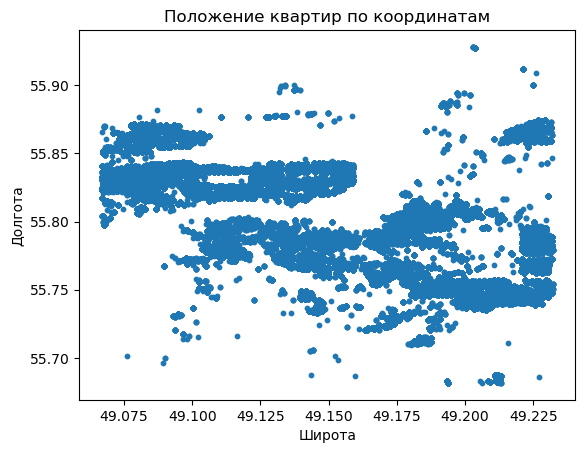

In [6]:
plt.suptitle("")
plt.title("Положение квартир по координатам")
plt.xlabel("Широта")
plt.ylabel("Долгота")
plt.scatter(df["geo_lon"], df["geo_lat"],s=10)


Отчистка выбросов

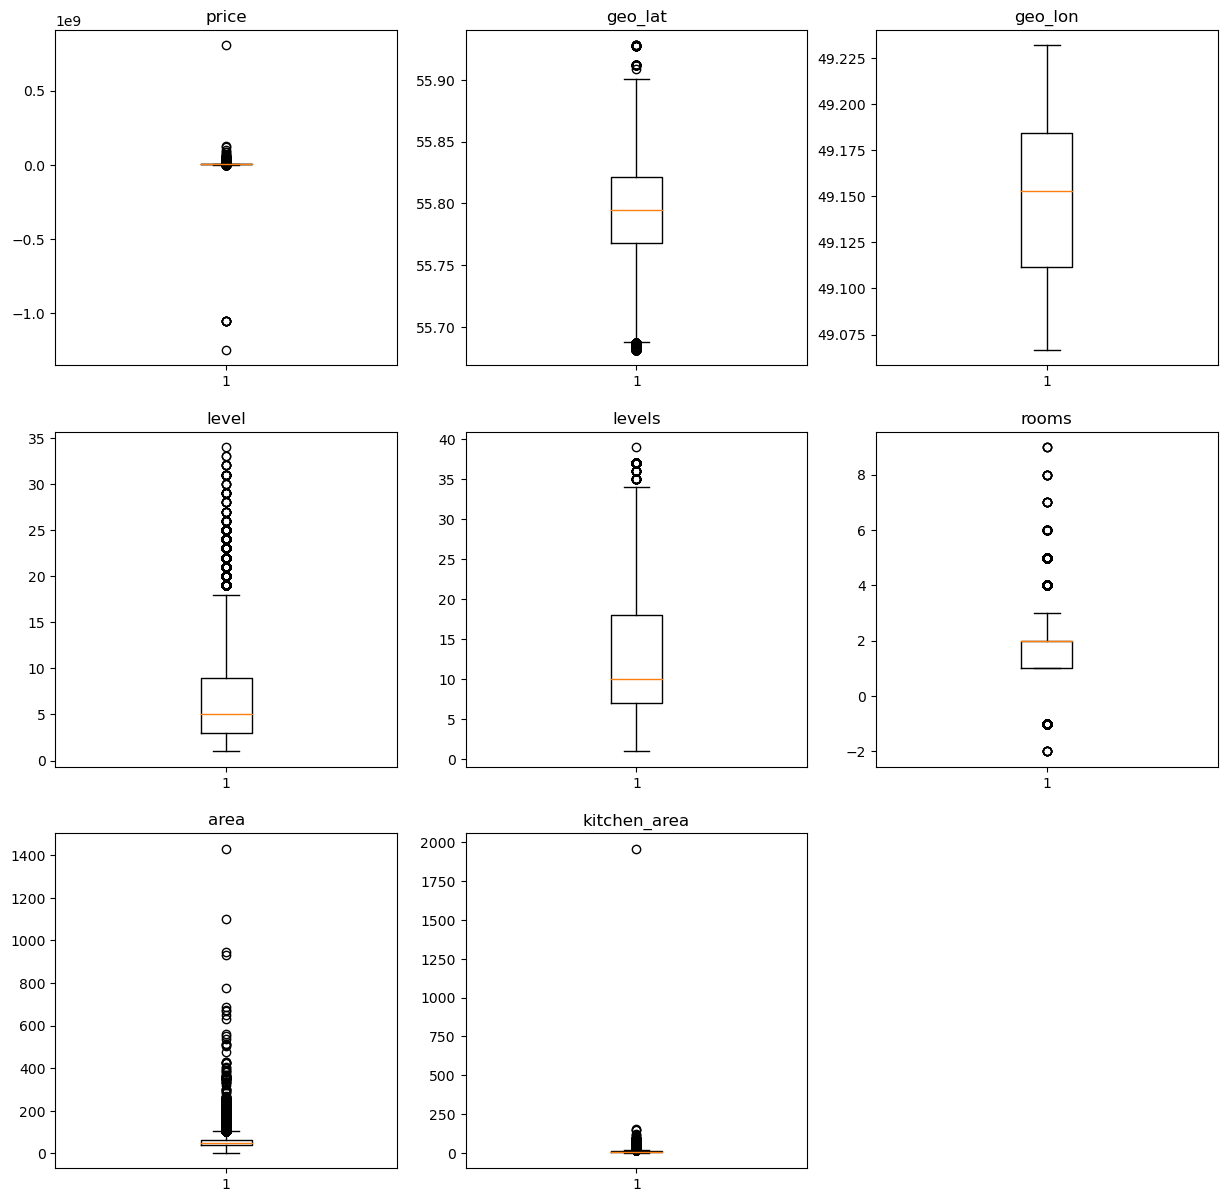

In [7]:
countable_cols = ["price", "geo_lat", "geo_lon", "level", "levels", "rooms", "area", "kitchen_area"] # рассмотрим все значимые числовые столбцы
def get_boxplots_for_df_col(source_df, columns):
  plt.figure(figsize=[15, 20])
  for col in columns:
    plt.subplot(4, 3, int(columns.index(col)+1))
    plt.gca().set_title(col)
    plt.boxplot(source_df[col])

columns = list(df[countable_cols].columns)
get_boxplots_for_df_col(df, columns)

In [8]:
# На графиках видно, что:
 # 1. Цена слишком завышена или идет в отрицательное число.
 # 2. Комнаты идут в отрицательное число.
 # 3. Площадь всей квартиры слишком большая.
 # 4. Площадь кухни в квартире слишком большая.

df = df[df["price"] < 10000000]  
df = df[df["price"] > 0]
df = df[df["rooms"] > 0]
df = df[df["area"] < 1000]
df = df[df["level"] > 0]
df = df[df["levels"] > 0]
df = df[df["kitchen_area"] < 350]

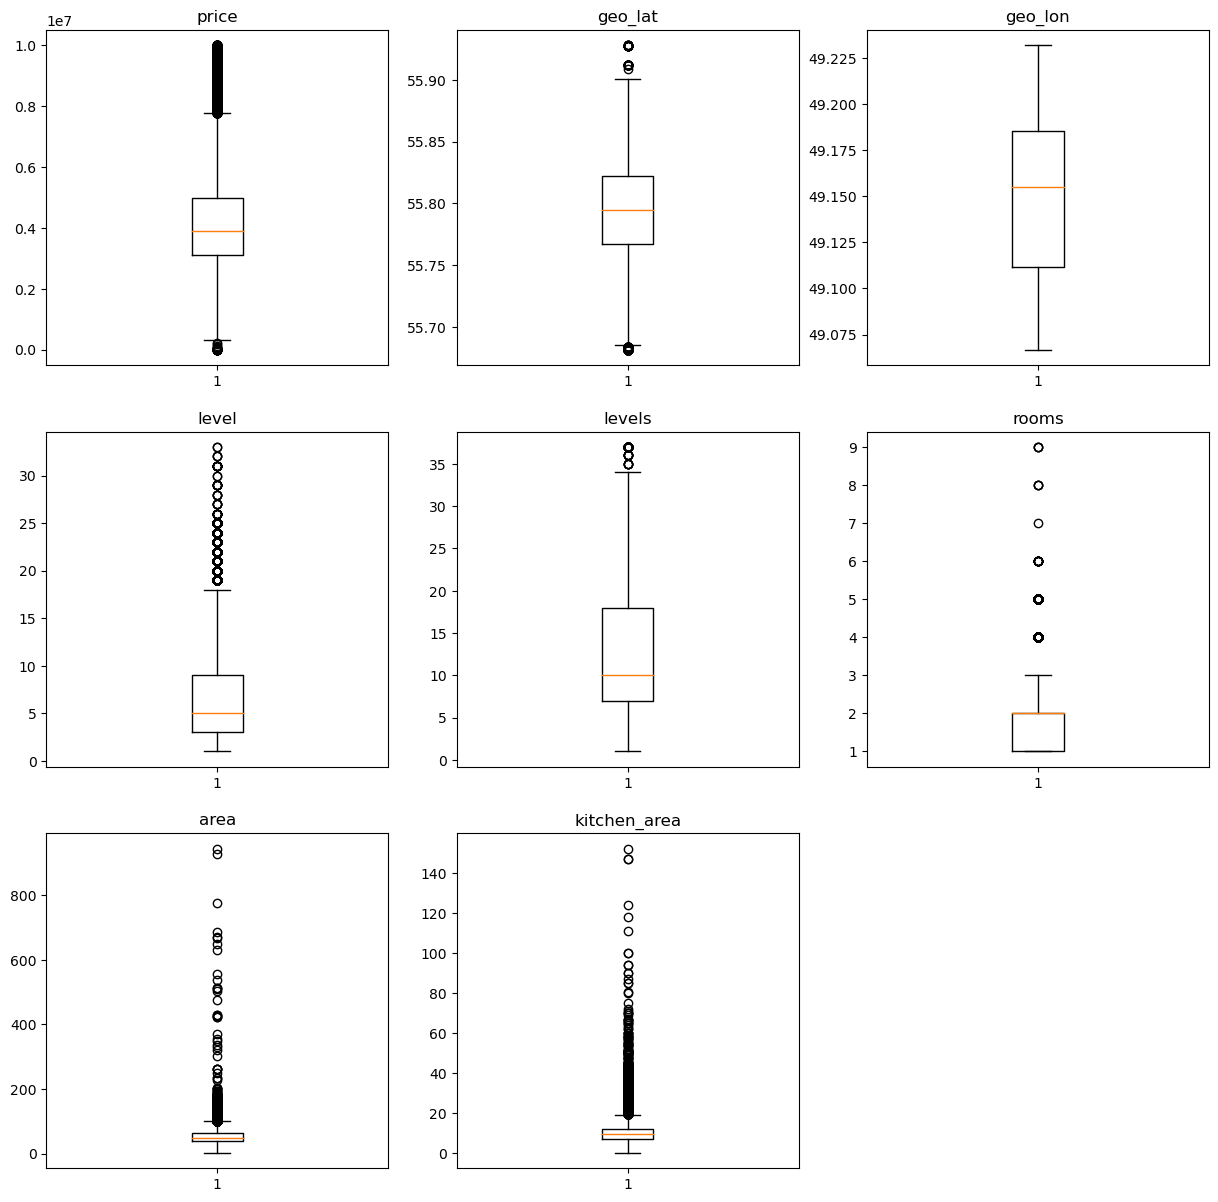

In [9]:

def get_boxplots_for_df_col(source_df, columns):
  plt.figure(figsize=[15, 20])
  for col in columns:
    plt.subplot(4, 3, int(columns.index(col)+1))
    plt.gca().set_title(col)
    plt.boxplot(source_df[col])

columns = list(df[countable_cols].columns)
get_boxplots_for_df_col(df, columns)

Вывод информации после фильтрации

In [10]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106971 entries, 16 to 5476985
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          106971 non-null  int64  
 1   date           106971 non-null  object 
 2   time           106971 non-null  object 
 3   geo_lat        106971 non-null  float64
 4   geo_lon        106971 non-null  float64
 5   region         106971 non-null  int64  
 6   building_type  106971 non-null  int64  
 7   level          106971 non-null  int64  
 8   levels         106971 non-null  int64  
 9   rooms          106971 non-null  int64  
 10  area           106971 non-null  float64
 11  kitchen_area   106971 non-null  float64
 12  object_type    106971 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 11.4+ MB


,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
16,4550000,2018-03-12,12:37:08,55.738846,49.225437,2922,3,6,10,2,54.2,11.4,1
82,4000000,2018-06-07,14:11:48,55.777062,49.216766,2922,2,11,14,2,66.0,10.6,11
113,3100000,2018-07-11,16:47:23,55.736290,49.100226,2922,1,8,10,1,39.6,8.8,1
154,3600000,2018-08-07,16:41:30,55.825765,49.072528,2922,3,4,6,1,57.7,9.3,1
186,2160000,2018-08-27,11:46:08,55.811698,49.195913,2922,3,2,5,1,31.0,6.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476529,4200000,2021-05-01,19:08:43,55.771098,49.133716,2922,1,4,5,2,43.0,4.5,1
5476623,6390000,2021-05-01,19:17:39,55.761868,49.166096,2922,3,4,5,3,103.0,26.7,1
5476757,3400000,2021-05-01,19:26:40,55.843468,49.096755,2922,3,2,5,1,30.0,6.0,1
5476798,3490000,2021-05-01,19:36:40,55.870114,49.084974,2922,1,6,9,1,35.0,7.0,1


In [11]:
df.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,1.069710e+05,106971.000000,106971.000000,106971.0,106971.000000,106971.000000,106971.000000,106971.000000,106971.000000,106971.000000,106971.000000
mean,4.201204e+06,55.792950,49.152564,2922.0,2.296538,6.405147,11.849969,1.808976,52.166619,10.053852,4.091586
std,1.605763e+06,0.038346,0.044979,0.0,0.825669,4.835944,6.195647,0.808207,21.169264,4.477811,4.621488
min,9.430000e+02,55.681646,49.066818,2922.0,0.000000,1.000000,1.000000,1.000000,1.400000,0.100000,1.000000
25%,3.100000e+06,55.767333,49.111497,2922.0,2.000000,3.000000,7.000000,1.000000,38.000000,7.100000,1.000000
50%,3.900000e+06,55.794358,49.155241,2922.0,3.000000,5.000000,10.000000,2.000000,48.000000,9.400000,1.000000
75%,4.970000e+06,55.822551,49.185609,2922.0,3.000000,9.000000,18.000000,2.000000,63.000000,12.000000,11.000000
max,9.999999e+06,55.928089,49.232070,2922.0,5.000000,33.000000,37.000000,9.000000,945.000000,152.000000,11.000000


<h3>3. Построим разные матрицы и графики</h3>

Матрица Корреляции

In [12]:
corr = df[countable_cols].corr()
corr.style.background_gradient(cmap='coolwarm')

,price,geo_lat,geo_lon,level,levels,rooms,area,kitchen_area
price,1.000000,-0.054749,0.055698,0.155252,0.227740,0.550970,0.729774,0.520045
geo_lat,-0.054749,1.000000,-0.464741,-0.183379,-0.260974,0.003751,-0.076806,-0.111520
geo_lon,0.055698,-0.464741,1.000000,0.081771,0.129611,0.037683,0.093582,0.088402
level,0.155252,-0.183379,0.081771,1.000000,0.643405,-0.041755,0.082452,0.195558
levels,0.227740,-0.260974,0.129611,0.643405,1.000000,-0.051904,0.129176,0.305350
rooms,0.550970,0.003751,0.037683,-0.041755,-0.051904,1.000000,0.738039,0.195012
area,0.729774,-0.076806,0.093582,0.082452,0.129176,0.738039,1.000000,0.518025
kitchen_area,0.520045,-0.111520,0.088402,0.195558,0.305350,0.195012,0.518025,1.000000


Тепловая карта

<Axes: >

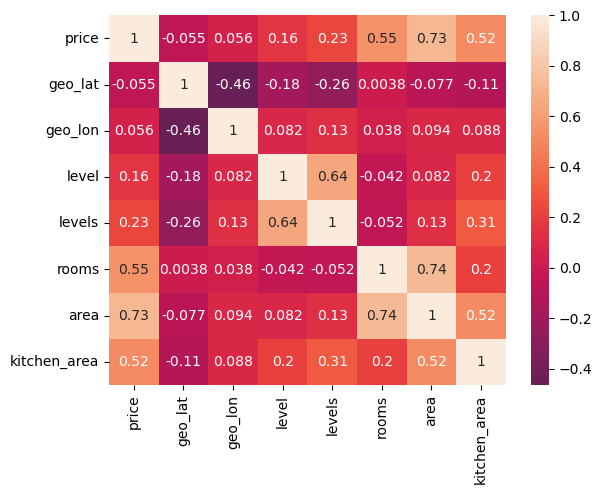

In [13]:
sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    #Цветовая схема
    cmap='rocket',
    center=0,
    annot=True
)

График зависимости цены на площадь квартиры в Казани

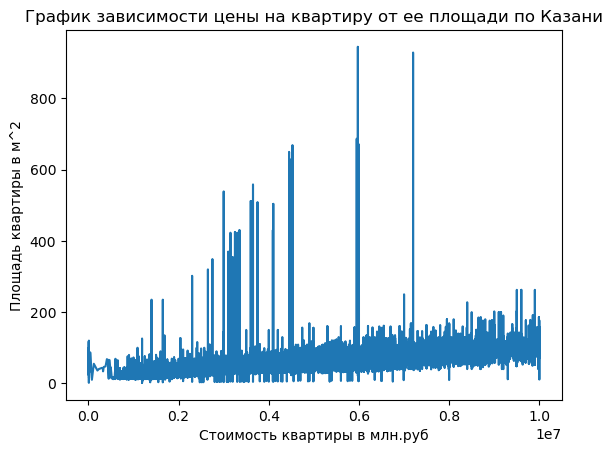

In [14]:
dfd = df[['area', 'price']]
dfd = dfd.sort_values('price')
plt.title("График зависимости цены на квартиру от ее площади по Казани")
plt.ylabel("Площадь квартиры в м^2")
plt.xlabel("Стоимость квартиры в млн.руб")
plt.plot(dfd['price'], dfd['area'])

<h3>Генерацяи признаков. Обогащение данными </h3>

In [15]:
# Обогащаем данными о расстоянии до метро и крупных ТЦ в Казани
from math import sqrt
import math as Math

# 11 Станций метро в Казани
metro_kazan =[
    (55.794886, 49.107283, "Кремлевская"), # Кремлевская
    (55.786129, 49.124374, "Площадь Тукая"), # Площадь Тукая
    (55.777605, 49.142994, "Суконная Слобода"), # Суконная Слобода
    (55.765556, 49.167004, "Аметьево"), # Аметьево
    (55.759961, 49.190449, "Горки"), # Горки
    (55.749599, 49.208494, "Проспект Победы"), # Проспект Победы
    (55.744116, 49.218427, "Дубравная"), # Дубравная
    (55.816623, 49.098842, "Козья Слобода"), # Козья Слобода
    (55.827191, 49.083535, "Яшьлек"), # Яшьлек
    (55.841716, 49.082623, "Северный вокзал"), # Северный вокзал
    (55.855724, 49.084878, "Авиастроительная") # Авиастроительная
    
]


# функция рассчета расстояния в метрах от точки до точки по координатам
def measure(lat1, lon1, lat2, lon2):
    R = 6378.137
    dLat = lat2 * Math.pi / 180 - lat1 * Math.pi / 180
    dLon = lon2 * Math.pi / 180 - lon1 * Math.pi / 180
    a = Math.sin(dLat/2) * Math.sin(dLat/2) + \
    Math.cos(lat1 * Math.pi / 180) * Math.cos(lat2 * Math.pi / 180) * \
    Math.sin(dLon/2) * Math.sin(dLon/2)
    c = 2 * Math.atan2(Math.sqrt(a), Math.sqrt(1-a))
    d = R * c
    return d * 1000

# функция поиска минимального расстояния до метро (в метрах)
def metro(s):
    min_distance = 1000000
    near = None
    for coord in metro_kazan:
      cur_distance = measure(coord[0], coord[1], s['geo_lat'], s['geo_lon'])
      if (cur_distance < min_distance):
        min_distance = cur_distance
        near = coord[2]
    return (near, round(min_distance))


# Добавляем новые столбцы с данными в наш файл (название станций метро, а так же расстоняие до них)
df["metro_distance"] = df.apply(metro, axis=1)
df[["metro_station", "metro_distance"]] = pd.DataFrame(df["metro_distance"].tolist(), index=df.index)


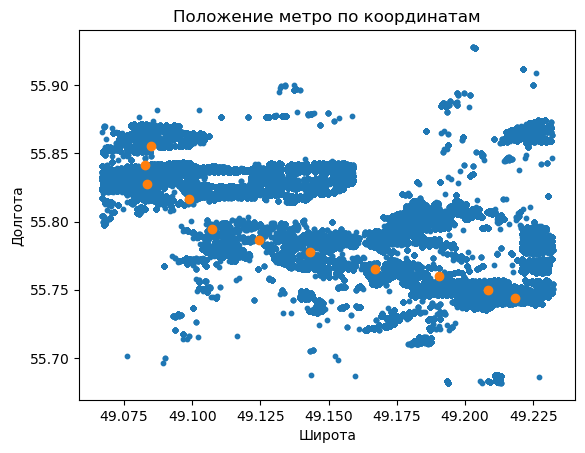

In [16]:
plt.suptitle("")
plt.title("Положение метро по координатам")
plt.xlabel("Широта")
plt.ylabel("Долгота")
plt.scatter(df["geo_lon"], df["geo_lat"],s=10)
a = []
b = []
for i in metro_kazan:
    a.append(i[0])
    b.append(i[1])
plt.scatter(b, a)


In [17]:
# добавим информацию о расстоянии до ближайшего ТЦ в г.Казнь в метрах

# всего  ТЦ (крупный)
coords_markets = [
    (55.782044, 49.213534,"ТЦ Мега"),
    (55.829008, 49.117291,"ТЦ Парк Хаус"),
    (55.802218, 49.110489,"ТЦ Кольцо"),
    (55.821096, 49.093202,"ТЦ Тандем"),
    (55.803224, 49.111195,"ТЦ Республика"),
    (55.805376, 49.105395,"ТЦ Кырлай"),
    (55.808746, 49.117847,"ТЦ Атак"),
    (55.764004, 49.186148,"ТЦ Горки Парк"),
    (55.768880, 49.217728,"ТЦ Южный"),
    (55.788868, 49.121918,"ТЦ Гум"),
    (55.783667, 49.223205,"ТЦ Домино")

]

# функция поиска минимального расстояния до ТЦ (в метрах)
def market(s):
    min_distance = 1000000
    near = None
    for coord in coords_markets:
      cur_distance = measure(coord[0], coord[1], s['geo_lat'], s['geo_lon'])
      if (cur_distance < min_distance):
        min_distance = cur_distance
        near = coord[2]
    return (near, round(min_distance))

# применяем функцию к набору данных в разрезе записей
df["market_distance"] = df.apply(market, axis=1)
df[["market", "market_distance"]] = pd.DataFrame(df["market_distance"].tolist(), index=df.index)



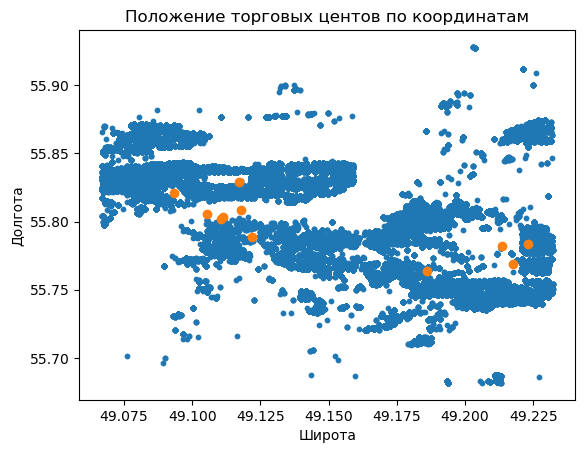

In [18]:
plt.suptitle("")
plt.title("Положение торговых центов по координатам")
plt.xlabel("Широта")
plt.ylabel("Долгота")
plt.scatter(df["geo_lon"], df["geo_lat"],s=10)
a = []
b = []
for i in coords_markets:
    a.append(i[0])
    b.append(i[1])
plt.scatter(b, a)

In [19]:
df

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,metro_distance,metro_station,market_distance,market
16,4550000,2018-03-12,12:37:08,55.738846,49.225437,2922,3,6,10,2,54.2,11.4,1,733,Дубравная,3378,ТЦ Южный
82,4000000,2018-06-07,14:11:48,55.777062,49.216766,2922,2,11,14,2,66.0,10.6,11,2518,Горки,590,ТЦ Мега
113,3100000,2018-07-11,16:47:23,55.736290,49.100226,2922,1,8,10,1,39.6,8.8,1,5303,Аметьево,6009,ТЦ Гум
154,3600000,2018-08-07,16:41:30,55.825765,49.072528,2922,3,4,6,1,57.7,9.3,1,706,Яшьлек,1393,ТЦ Тандем
186,2160000,2018-08-27,11:46:08,55.811698,49.195913,2922,3,2,5,1,31.0,6.5,1,5037,Суконная Слобода,3480,ТЦ Мега
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476529,4200000,2021-05-01,19:08:43,55.771098,49.133716,2922,1,4,5,2,43.0,4.5,1,929,Суконная Слобода,2112,ТЦ Гум
5476623,6390000,2021-05-01,19:17:39,55.761868,49.166096,2922,3,4,5,3,103.0,26.7,1,414,Аметьево,1278,ТЦ Горки Парк
5476757,3400000,2021-05-01,19:26:40,55.843468,49.096755,2922,3,2,5,1,30.0,6.0,1,905,Северный вокзал,2059,ТЦ Парк Хаус
5476798,3490000,2021-05-01,19:36:40,55.870114,49.084974,2922,1,6,9,1,35.0,7.0,1,1602,Авиастроительная,5002,ТЦ Парк Хаус


<h3>5. Визуализация данных. Dashboard</h3>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


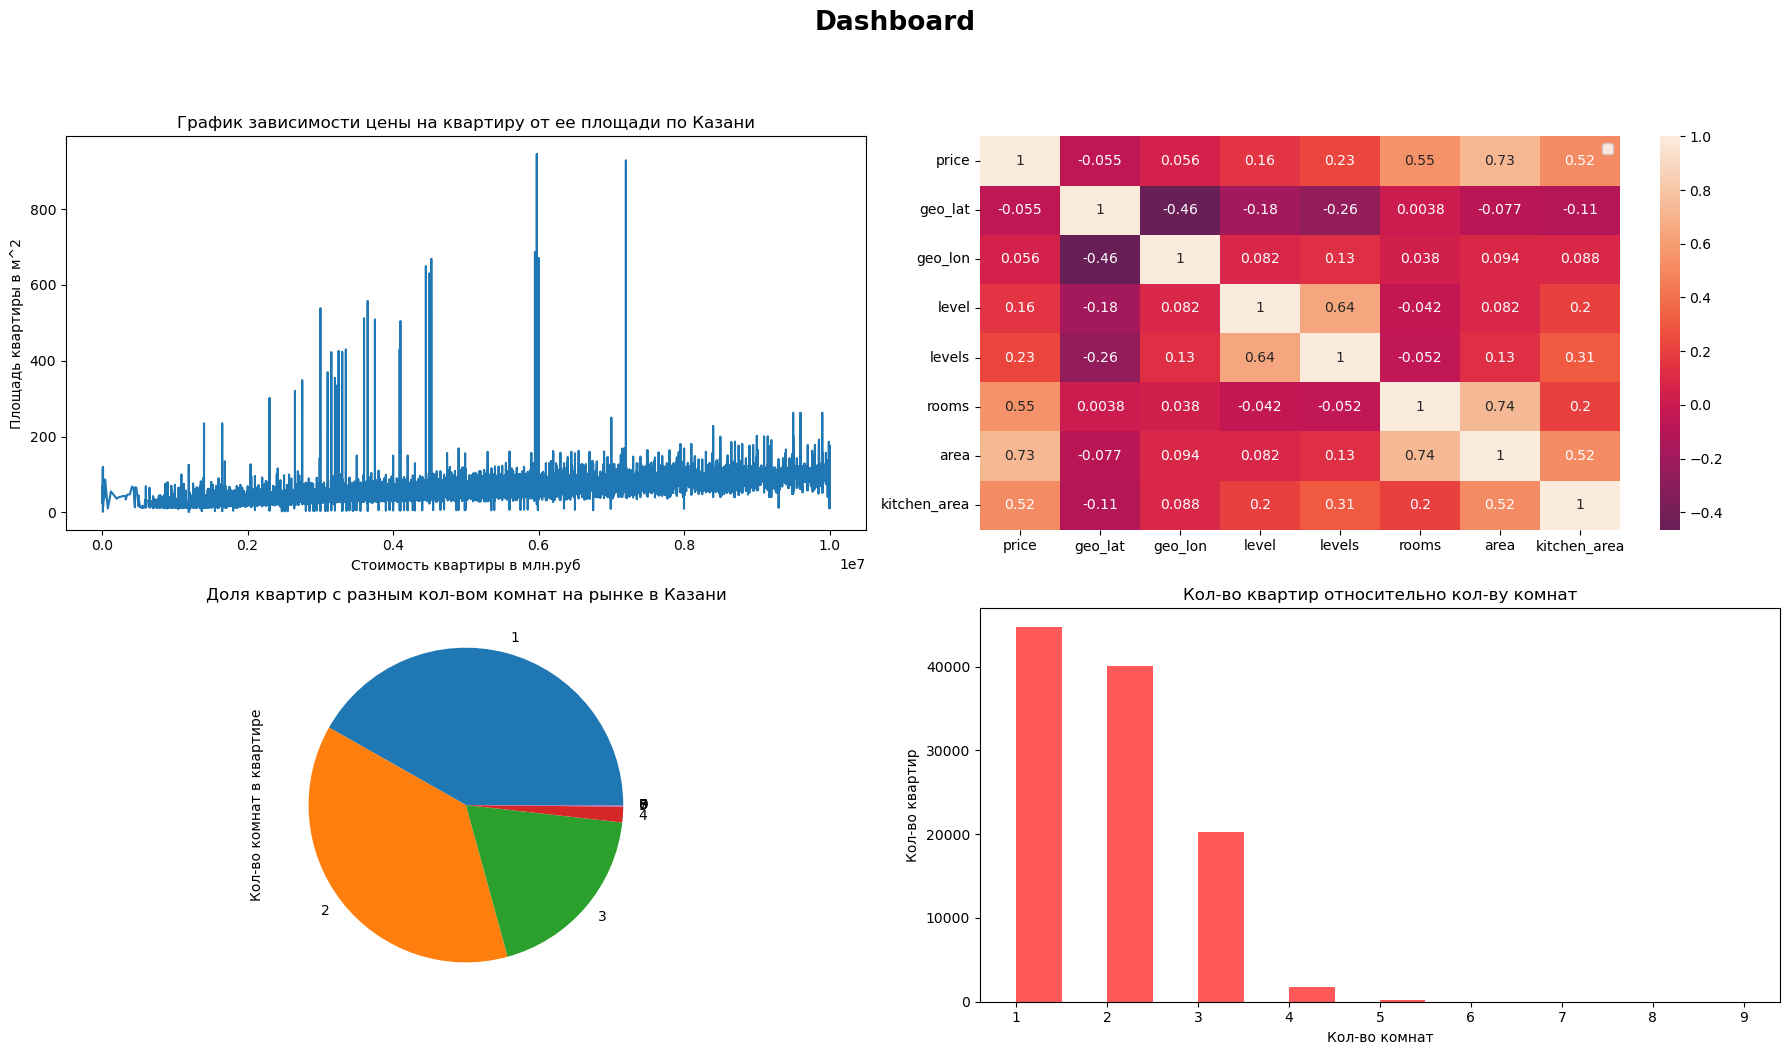

In [20]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# размер сетки
plt.figure(figsize=[18, 10])

plt.suptitle('Dashboard',
              y=1.05,
              fontsize=19,
              fontweight='bold')

plt.subplot(2, 2, 1)
dfd = df[['area', 'price']]
dfd = dfd.sort_values('price')
plt.title("График зависимости цены на квартиру от ее площади по Казани")
plt.ylabel("Площадь квартиры в м^2")
plt.xlabel("Стоимость квартиры в млн.руб")
plt.plot(dfd['price'], dfd['area'])

plt.subplot(2, 2, 4)
plt.title('Кол-во квартир относительно кол-ву комнат')
plt.hist(df["rooms"], 16, color='red', alpha=0.65)
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во квартир')

plt.subplot(2, 2, 3)
df1 = df.groupby('rooms').size()
df1.plot(kind='pie', subplots=True, figsize=(10, 10))
plt.title("Доля квартир с разным кол-вом комнат на рынке в Казани")
plt.ylabel("Кол-во комнат в квартире")

plt.subplot(2, 2, 2)
sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    #Цветовая схема
    cmap='rocket',
    center=0,
    annot=True
)

# Легенда
plt.legend()

# Отображение графика
plt.tight_layout()
plt.show()

Вывод:

Полученные навыки:
- Научился работать с matplotlib, numpy, pandas.
- Визуализация графиков в Питоне.
- Способ представления и обработка юольших данных.
- Работа с разными библиотеками
Эти навыки помогут с работой машинного обучения и разной логикой задач

Выполнено:
- Визуализация графиков, и dashboard
- Данные расположения метро (геолокация взята из гугл карт)
- Данные расположения крупных ТЦ (геолокация взята из гугл карт)
- Обработка данных файла, добавленно расстояние до ближайшей станции метро и крупного ТЦ